In [148]:
%matplotlib inline

from modsim import *

from pandas import read_csv

filename = 'india.csv'
table = read_csv(filename, header=0, index_col=0, decimal='M')



In [149]:
table.columns = ['avg_pop', 'births', 'deaths', 'natural_change', 
                  'crude_birth_rate', 'crude_death_rate', 'natural_change_k', 'fertility']

In [262]:
def plotting(x_1, x_2):
    newfig()
    
    plot(x_1, ':', color='darkblue', label='Simulation')
    plot(x_2, ':', color='red', label='Data')
    decorate(xlabel='Year',
    ylabel='World Population')

In [263]:
last_year = table.avg_pop.index[0]
first_year = table.avg_pop.index[-1]

avg_pop = table.avg_pop


In [264]:

def slope(recent_year = 2015, past_year = 2007):
    
    
    pop_difference = avg_pop[recent_year] - avg_pop[past_year]
    elapsed_time = recent_year - past_year
    annual_growth = pop_difference / elapsed_time
    
    return annual_growth
    print('Annual Growth:', annual_growth)
    
    
annual_growth = slope()

In [265]:
def simulating_pop(starting_year = 1981, ending_year = 2050):
    
    results = TimeSeries()
    results[first_year] = avg_pop[first_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + annual_growth
        
    
    return results
    
    

In [266]:
calculated_pop = simulating_pop()

Saving figure to file Population_Estimate_1.pdf


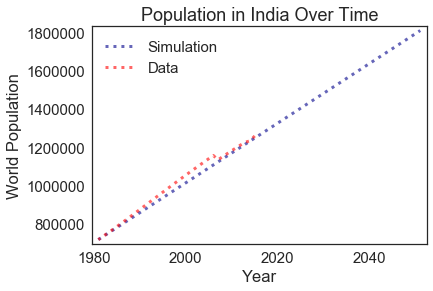

In [267]:
plotting(calculated_pop, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1.pdf')

In [ ]:
def simulate_until_pop(pop_limit = 1500000):
    
    results = TimeSeries()
    results[first_year] = avg_pop[first_year]
    
    
